In [1]:
import cv2
import numpy as np
import os
import mediapipe as mp
from matplotlib import pyplot as plt
import time

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame=cap.read()
        image, results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image,results)
        cv2.imshow('camera', image)
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

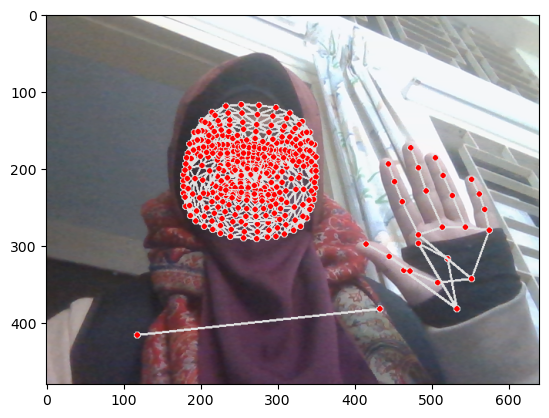

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
results.pose_landmarks

landmark {
  x: 0.42213425
  y: 0.4631316
  z: -0.8324884
  visibility: 0.99974376
}
landmark {
  x: 0.4428571
  y: 0.38728002
  z: -0.75280154
  visibility: 0.9997165
}
landmark {
  x: 0.46226248
  y: 0.3873884
  z: -0.75265443
  visibility: 0.9997276
}
landmark {
  x: 0.48196
  y: 0.38877168
  z: -0.7521575
  visibility: 0.9997373
}
landmark {
  x: 0.38892725
  y: 0.3992653
  z: -0.7631776
  visibility: 0.99965847
}
landmark {
  x: 0.369677
  y: 0.4075303
  z: -0.76231754
  visibility: 0.99963343
}
landmark {
  x: 0.3507858
  y: 0.41673148
  z: -0.76264757
  visibility: 0.9996026
}
landmark {
  x: 0.5128211
  y: 0.4426335
  z: -0.28071934
  visibility: 0.99976796
}
landmark {
  x: 0.31916723
  y: 0.48491588
  z: -0.31356034
  visibility: 0.99957746
}
landmark {
  x: 0.4748346
  y: 0.5544222
  z: -0.6568699
  visibility: 0.9996159
}
landmark {
  x: 0.3963398
  y: 0.5613726
  z: -0.66848654
  visibility: 0.9995114
}
landmark {
  x: 0.6771787
  y: 0.79726535
  z: -0.036187526
  visibili

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.41213715,  0.45118791, -0.0563221 , ...,  0.5147922 ,
        0.36829942,  0.0482765 ])

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.42213425,  0.46313161, -0.83248842, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.42213425,  0.46313161, -0.83248842, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
DATA_PATH = os.path.join('sld_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [23]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [33]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                ret, frame=cap.read()
                image, results = mediapipe_detection(frame,holistic)
                print(results)
                draw_styled_landmarks(image,results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('camera', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
            
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
               
        
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
cap.release()
cv2.destroyAllWindows()

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map 

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [67]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [68]:
np.array(sequences).shape

(90, 30, 1662)

In [69]:
np.array(labels).shape

(90,)

In [70]:
X = np.array(sequences)

In [71]:
X

array([[[ 0.50588065,  0.70648062, -1.95011449, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50272399,  0.66224343, -1.56904268, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50275475,  0.65328747, -1.30683768, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.50025946,  0.59779429, -1.4726125 , ...,  0.16951323,
          0.42854026, -0.04402105],
        [ 0.50181091,  0.59829611, -1.41175389, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50231707,  0.59845811, -1.38755488, ...,  0.05246613,
          0.27413407,  0.1026161 ]],

       [[ 0.50696146,  0.60210115, -1.41832042, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50681698,  0.60230273, -1.11112642, ...,  0.2608512 ,
          0.36997223, -0.02596078],
        [ 0.5068537 ,  0.60201114, -1.38839102, ...,  0.15256701,
          0.35659033, -0.02813406],
        ...,
        [ 0.49980706,  0.61135989, -1.11877763, ...,  

In [72]:
y = to_categorical(labels).astype(int)

In [73]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [75]:
y_train.shape

(85, 3)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [77]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [96]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [79]:
res = [.7, 0.2, 0.1]

In [80]:
actions[np.argmax(res)]

'hello'

In [81]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 121ms/step - loss: 3.6737 - categorical_accuracy: 0.3765
Epoch 2/2000
3/3 [==============================] - 0s 92ms/step - loss: 32.7040 - categorical_accuracy: 0.2588
Epoch 3/2000
3/3 [==============================] - 0s 106ms/step - loss: 115.7363 - categorical_accuracy: 0.2941
Epoch 4/2000
3/3 [==============================] - 0s 105ms/step - loss: 94.3669 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 105ms/step - loss: 133.3477 - categorical_accuracy: 0.3059
Epoch 6/2000
3/3 [==============================] - 0s 92ms/step - loss: 207.1546 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 105ms/step - loss: 221.9154 - categorical_accuracy: 0.2588
Epoch 8/2000
3/3 [==============================] - 0s 107ms/step - loss: 220.2557 - categorical_accuracy: 0.2824
Epoch 9/2000
3/3 [==============================] - 0s 111ms/step - loss: 204.6809 - categoric

3/3 [==============================] - 0s 96ms/step - loss: 303.0270 - categorical_accuracy: 0.3294
Epoch 73/2000
3/3 [==============================] - 0s 103ms/step - loss: 253.2966 - categorical_accuracy: 0.3176
Epoch 74/2000
3/3 [==============================] - 0s 102ms/step - loss: 241.1384 - categorical_accuracy: 0.3412
Epoch 75/2000
3/3 [==============================] - 0s 108ms/step - loss: 204.4556 - categorical_accuracy: 0.4000
Epoch 76/2000
3/3 [==============================] - 0s 94ms/step - loss: 153.2753 - categorical_accuracy: 0.4706
Epoch 77/2000
3/3 [==============================] - 0s 105ms/step - loss: 114.5896 - categorical_accuracy: 0.5412
Epoch 78/2000
3/3 [==============================] - 0s 108ms/step - loss: 200.1006 - categorical_accuracy: 0.4471
Epoch 79/2000
3/3 [==============================] - 0s 109ms/step - loss: 96.6261 - categorical_accuracy: 0.3647
Epoch 80/2000
3/3 [==============================] - 0s 110ms/step - loss: 121.7889 - categorical

3/3 [==============================] - 0s 109ms/step - loss: 21.8001 - categorical_accuracy: 0.3882
Epoch 144/2000
3/3 [==============================] - 0s 96ms/step - loss: 34.3691 - categorical_accuracy: 0.3059
Epoch 145/2000
3/3 [==============================] - 0s 109ms/step - loss: 41.2300 - categorical_accuracy: 0.3412
Epoch 146/2000
3/3 [==============================] - 0s 110ms/step - loss: 21.7936 - categorical_accuracy: 0.3294
Epoch 147/2000
3/3 [==============================] - 0s 113ms/step - loss: 20.7210 - categorical_accuracy: 0.3294
Epoch 148/2000
3/3 [==============================] - 0s 135ms/step - loss: 23.7636 - categorical_accuracy: 0.3647
Epoch 149/2000
3/3 [==============================] - 0s 104ms/step - loss: 20.3538 - categorical_accuracy: 0.4588
Epoch 150/2000
3/3 [==============================] - 0s 127ms/step - loss: 24.2846 - categorical_accuracy: 0.3176
Epoch 151/2000
3/3 [==============================] - 0s 115ms/step - loss: 16.7166 - categorica

3/3 [==============================] - 0s 106ms/step - loss: 12.4223 - categorical_accuracy: 0.3647
Epoch 215/2000
3/3 [==============================] - 0s 95ms/step - loss: 15.1363 - categorical_accuracy: 0.3765
Epoch 216/2000
3/3 [==============================] - 0s 105ms/step - loss: 14.0303 - categorical_accuracy: 0.3882
Epoch 217/2000
3/3 [==============================] - 0s 105ms/step - loss: 8.4817 - categorical_accuracy: 0.4941
Epoch 218/2000
3/3 [==============================] - 0s 118ms/step - loss: 5.2625 - categorical_accuracy: 0.3412
Epoch 219/2000
3/3 [==============================] - 0s 106ms/step - loss: 12.7168 - categorical_accuracy: 0.3294
Epoch 220/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.2882 - categorical_accuracy: 0.3765
Epoch 221/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.0466 - categorical_accuracy: 0.5529
Epoch 222/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.4228 - categorical_acc

3/3 [==============================] - 0s 114ms/step - loss: 9.1976 - categorical_accuracy: 0.5176
Epoch 286/2000
3/3 [==============================] - 0s 111ms/step - loss: 10.8953 - categorical_accuracy: 0.3647
Epoch 287/2000
3/3 [==============================] - 0s 104ms/step - loss: 9.2135 - categorical_accuracy: 0.2824
Epoch 288/2000
3/3 [==============================] - 0s 114ms/step - loss: 5.0898 - categorical_accuracy: 0.5412
Epoch 289/2000
3/3 [==============================] - 0s 109ms/step - loss: 11.9243 - categorical_accuracy: 0.3647
Epoch 290/2000
3/3 [==============================] - 0s 113ms/step - loss: 16.5185 - categorical_accuracy: 0.5882
Epoch 291/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.3796 - categorical_accuracy: 0.5294
Epoch 292/2000
3/3 [==============================] - 0s 111ms/step - loss: 19.4645 - categorical_accuracy: 0.5647
Epoch 293/2000
3/3 [==============================] - 0s 106ms/step - loss: 13.8263 - categorical_a

3/3 [==============================] - 0s 109ms/step - loss: 1.8734 - categorical_accuracy: 0.6588
Epoch 357/2000
3/3 [==============================] - 0s 106ms/step - loss: 4.5060 - categorical_accuracy: 0.5176
Epoch 358/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.0447 - categorical_accuracy: 0.6941
Epoch 359/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.3960 - categorical_accuracy: 0.5765
Epoch 360/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.5315 - categorical_accuracy: 0.6941
Epoch 361/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.8018 - categorical_accuracy: 0.7176
Epoch 362/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.5694 - categorical_accuracy: 0.6471
Epoch 363/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.2297 - categorical_accuracy: 0.7412
Epoch 364/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.6403 - categorical_accura

Epoch 428/2000
3/3 [==============================] - 0s 122ms/step - loss: 8.8049 - categorical_accuracy: 0.4941
Epoch 429/2000
3/3 [==============================] - 0s 93ms/step - loss: 9.3548 - categorical_accuracy: 0.3647
Epoch 430/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.8782 - categorical_accuracy: 0.5059
Epoch 431/2000
3/3 [==============================] - 0s 108ms/step - loss: 5.7361 - categorical_accuracy: 0.6471
Epoch 432/2000
3/3 [==============================] - 0s 99ms/step - loss: 7.0244 - categorical_accuracy: 0.6235
Epoch 433/2000
3/3 [==============================] - 0s 106ms/step - loss: 8.7670 - categorical_accuracy: 0.4941
Epoch 434/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.8895 - categorical_accuracy: 0.6235
Epoch 435/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.5000 - categorical_accuracy: 0.5294
Epoch 436/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.9670 - categ

3/3 [==============================] - 0s 109ms/step - loss: 1.7345 - categorical_accuracy: 0.6941
Epoch 500/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.9369 - categorical_accuracy: 0.6235
Epoch 501/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.2368 - categorical_accuracy: 0.6706
Epoch 502/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.3993 - categorical_accuracy: 0.7529
Epoch 503/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0674 - categorical_accuracy: 0.7882
Epoch 504/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5980 - categorical_accuracy: 0.7294
Epoch 505/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.9834 - categorical_accuracy: 0.7529
Epoch 506/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.4452 - categorical_accuracy: 0.7412
Epoch 507/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.2768 - categorical_accura

Epoch 571/2000
3/3 [==============================] - 0s 107ms/step - loss: 9.5625 - categorical_accuracy: 0.5882
Epoch 572/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.1617 - categorical_accuracy: 0.5882
Epoch 573/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.8954 - categorical_accuracy: 0.6353
Epoch 574/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.9242 - categorical_accuracy: 0.5647
Epoch 575/2000
3/3 [==============================] - 0s 108ms/step - loss: 9.8263 - categorical_accuracy: 0.6000
Epoch 576/2000
3/3 [==============================] - 0s 114ms/step - loss: 4.8313 - categorical_accuracy: 0.5882
Epoch 577/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.0485 - categorical_accuracy: 0.6000
Epoch 578/2000
3/3 [==============================] - 0s 87ms/step - loss: 4.6136 - categorical_accuracy: 0.6706
Epoch 579/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.2873 - categ

3/3 [==============================] - 0s 105ms/step - loss: 2.2832 - categorical_accuracy: 0.7647
Epoch 643/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.5747 - categorical_accuracy: 0.6824
Epoch 644/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.3769 - categorical_accuracy: 0.7529
Epoch 645/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.6012 - categorical_accuracy: 0.5882
Epoch 646/2000
3/3 [==============================] - 0s 103ms/step - loss: 7.9672 - categorical_accuracy: 0.5647
Epoch 647/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.7452 - categorical_accuracy: 0.5647
Epoch 648/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.5053 - categorical_accuracy: 0.5529
Epoch 649/2000
3/3 [==============================] - 0s 108ms/step - loss: 4.2608 - categorical_accuracy: 0.5882
Epoch 650/2000
3/3 [==============================] - 0s 104ms/step - loss: 7.8406 - categorical_accura

3/3 [==============================] - 0s 103ms/step - loss: 2.0507 - categorical_accuracy: 0.5765
Epoch 715/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.3470 - categorical_accuracy: 0.6118
Epoch 716/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.8165 - categorical_accuracy: 0.6706
Epoch 717/2000
3/3 [==============================] - 0s 99ms/step - loss: 4.1589 - categorical_accuracy: 0.5529
Epoch 718/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.4220 - categorical_accuracy: 0.7059
Epoch 719/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.4733 - categorical_accuracy: 0.7176
Epoch 720/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.9844 - categorical_accuracy: 0.8118
Epoch 721/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.3889 - categorical_accuracy: 0.6706
Epoch 722/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9909 - categorical_accuracy:

3/3 [==============================] - 0s 125ms/step - loss: 1.5605 - categorical_accuracy: 0.7647
Epoch 786/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.1486 - categorical_accuracy: 0.7647
Epoch 787/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.1846 - categorical_accuracy: 0.7412
Epoch 788/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.1507 - categorical_accuracy: 0.8000
Epoch 789/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.9479 - categorical_accuracy: 0.7412
Epoch 790/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.1132 - categorical_accuracy: 0.8000
Epoch 791/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.9858 - categorical_accuracy: 0.8000
Epoch 792/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.5463 - categorical_accuracy: 0.7176
Epoch 793/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.7882 - categorical_accura

3/3 [==============================] - 0s 99ms/step - loss: 1.1296 - categorical_accuracy: 0.7412
Epoch 858/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.3228 - categorical_accuracy: 0.6706
Epoch 859/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.7817 - categorical_accuracy: 0.7882
Epoch 860/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.0581 - categorical_accuracy: 0.7647
Epoch 861/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.0273 - categorical_accuracy: 0.7765
Epoch 862/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.8589 - categorical_accuracy: 0.5412
Epoch 863/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.3219 - categorical_accuracy: 0.6471
Epoch 864/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.6875 - categorical_accuracy: 0.7882
Epoch 865/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9556 - categorical_accuracy: 0

3/3 [==============================] - 0s 115ms/step - loss: 5.3965 - categorical_accuracy: 0.6118
Epoch 930/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.2510 - categorical_accuracy: 0.5882
Epoch 931/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.3521 - categorical_accuracy: 0.5176
Epoch 932/2000
3/3 [==============================] - 0s 118ms/step - loss: 11.5926 - categorical_accuracy: 0.4706
Epoch 933/2000
3/3 [==============================] - 0s 118ms/step - loss: 7.1330 - categorical_accuracy: 0.5412
Epoch 934/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.6773 - categorical_accuracy: 0.6471
Epoch 935/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.9779 - categorical_accuracy: 0.4706
Epoch 936/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.8339 - categorical_accuracy: 0.7059
Epoch 937/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.6949 - categorical_accur

3/3 [==============================] - 0s 99ms/step - loss: 3.4560 - categorical_accuracy: 0.6706
Epoch 1002/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.5855 - categorical_accuracy: 0.6000
Epoch 1003/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.2448 - categorical_accuracy: 0.6235
Epoch 1004/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.6617 - categorical_accuracy: 0.6235
Epoch 1005/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.0454 - categorical_accuracy: 0.6000
Epoch 1006/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.9228 - categorical_accuracy: 0.5529
Epoch 1007/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.3768 - categorical_accuracy: 0.7294
Epoch 1008/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.3132 - categorical_accuracy: 0.7882
Epoch 1009/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.8591 - categorical_accu

3/3 [==============================] - 0s 97ms/step - loss: 1.7771 - categorical_accuracy: 0.6588
Epoch 1073/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.6095 - categorical_accuracy: 0.7412
Epoch 1074/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.1015 - categorical_accuracy: 0.5882
Epoch 1075/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.7238 - categorical_accuracy: 0.7882
Epoch 1076/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.8131 - categorical_accuracy: 0.7294
Epoch 1077/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.5854 - categorical_accuracy: 0.6471
Epoch 1078/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.8022 - categorical_accuracy: 0.5647
Epoch 1079/2000
3/3 [==============================] - 0s 108ms/step - loss: 5.8266 - categorical_accuracy: 0.6706
Epoch 1080/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.9817 - categorical_

3/3 [==============================] - 0s 103ms/step - loss: 0.5133 - categorical_accuracy: 0.8706
Epoch 1144/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3362 - categorical_accuracy: 0.9059
Epoch 1145/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.8175 - categorical_accuracy: 0.8000
Epoch 1146/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8303 - categorical_accuracy: 0.7882
Epoch 1147/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.2647 - categorical_accuracy: 0.6941
Epoch 1148/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.7914 - categorical_accuracy: 0.8118
Epoch 1149/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4774 - categorical_accuracy: 0.8235
Epoch 1150/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.6394 - categorical_accuracy: 0.8118
Epoch 1151/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.3730 - categorical_a

3/3 [==============================] - 0s 107ms/step - loss: 2.6109 - categorical_accuracy: 0.6471
Epoch 1215/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.9713 - categorical_accuracy: 0.6000
Epoch 1216/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.1310 - categorical_accuracy: 0.5765
Epoch 1217/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.3366 - categorical_accuracy: 0.6471
Epoch 1218/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.3539 - categorical_accuracy: 0.6118
Epoch 1219/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.3858 - categorical_accuracy: 0.7765
Epoch 1220/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6640 - categorical_accuracy: 0.6706
Epoch 1221/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.7500 - categorical_accuracy: 0.7765
Epoch 1222/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1618 - categorical_

3/3 [==============================] - 0s 113ms/step - loss: 3.4205 - categorical_accuracy: 0.6235
Epoch 1286/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.3678 - categorical_accuracy: 0.5294
Epoch 1287/2000
3/3 [==============================] - 0s 95ms/step - loss: 7.7554 - categorical_accuracy: 0.4941
Epoch 1288/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.1618 - categorical_accuracy: 0.5647
Epoch 1289/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.2635 - categorical_accuracy: 0.4235
Epoch 1290/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.6244 - categorical_accuracy: 0.6706
Epoch 1291/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.9575 - categorical_accuracy: 0.6118
Epoch 1292/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.6211 - categorical_accuracy: 0.6824
Epoch 1293/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.1818 - categorical

3/3 [==============================] - 0s 106ms/step - loss: 3.0305 - categorical_accuracy: 0.6824
Epoch 1357/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.2084 - categorical_accuracy: 0.6824
Epoch 1358/2000
3/3 [==============================] - 0s 91ms/step - loss: 4.3654 - categorical_accuracy: 0.6000
Epoch 1359/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.1042 - categorical_accuracy: 0.6824
Epoch 1360/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.3788 - categorical_accuracy: 0.7059
Epoch 1361/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.3081 - categorical_accuracy: 0.7647
Epoch 1362/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.4399 - categorical_accuracy: 0.8118
Epoch 1363/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.7515 - categorical_accuracy: 0.7412
Epoch 1364/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.4120 - categorical_

3/3 [==============================] - 0s 107ms/step - loss: 8.3772 - categorical_accuracy: 0.4353
Epoch 1428/2000
3/3 [==============================] - 0s 103ms/step - loss: 5.7686 - categorical_accuracy: 0.4706
Epoch 1429/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.7241 - categorical_accuracy: 0.5176
Epoch 1430/2000
3/3 [==============================] - 0s 102ms/step - loss: 7.8186 - categorical_accuracy: 0.5059
Epoch 1431/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.8558 - categorical_accuracy: 0.5529
Epoch 1432/2000
3/3 [==============================] - 0s 102ms/step - loss: 9.7930 - categorical_accuracy: 0.4588
Epoch 1433/2000
3/3 [==============================] - 0s 108ms/step - loss: 4.0613 - categorical_accuracy: 0.5529
Epoch 1434/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.5182 - categorical_accuracy: 0.5882
Epoch 1435/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.4048 - categorica

3/3 [==============================] - 0s 128ms/step - loss: 11.0942 - categorical_accuracy: 0.4588
Epoch 1499/2000
3/3 [==============================] - 0s 106ms/step - loss: 10.2754 - categorical_accuracy: 0.4118
Epoch 1500/2000
3/3 [==============================] - 0s 107ms/step - loss: 6.2404 - categorical_accuracy: 0.5294
Epoch 1501/2000
3/3 [==============================] - 0s 106ms/step - loss: 7.4938 - categorical_accuracy: 0.4706
Epoch 1502/2000
3/3 [==============================] - 0s 114ms/step - loss: 4.2603 - categorical_accuracy: 0.6000
Epoch 1503/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.4640 - categorical_accuracy: 0.5882
Epoch 1504/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.8709 - categorical_accuracy: 0.7059
Epoch 1505/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.8286 - categorical_accuracy: 0.5882
Epoch 1506/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.4612 - categori

3/3 [==============================] - 0s 117ms/step - loss: 0.5926 - categorical_accuracy: 0.8353
Epoch 1570/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.6564 - categorical_accuracy: 0.7412
Epoch 1571/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.9500 - categorical_accuracy: 0.7176
Epoch 1572/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4643 - categorical_accuracy: 0.8353
Epoch 1573/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.7904 - categorical_accuracy: 0.7765
Epoch 1574/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6776 - categorical_accuracy: 0.7529
Epoch 1575/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.7119 - categorical_accuracy: 0.7412
Epoch 1576/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0704 - categorical_accuracy: 0.7529
Epoch 1577/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4985 - categorical

3/3 [==============================] - 0s 109ms/step - loss: 1.4618 - categorical_accuracy: 0.6824
Epoch 1641/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.3746 - categorical_accuracy: 0.6824
Epoch 1642/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.1564 - categorical_accuracy: 0.7647
Epoch 1643/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.3501 - categorical_accuracy: 0.6471
Epoch 1644/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.5571 - categorical_accuracy: 0.6706
Epoch 1645/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0857 - categorical_accuracy: 0.6353
Epoch 1646/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.7068 - categorical_accuracy: 0.6706
Epoch 1647/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.5235 - categorical_accuracy: 0.6000
Epoch 1648/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.2665 - categorical

3/3 [==============================] - 0s 119ms/step - loss: 3.3824 - categorical_accuracy: 0.6824
Epoch 1712/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.8962 - categorical_accuracy: 0.5529
Epoch 1713/2000
3/3 [==============================] - 0s 111ms/step - loss: 2.7649 - categorical_accuracy: 0.6471
Epoch 1714/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.1185 - categorical_accuracy: 0.7529
Epoch 1715/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.5696 - categorical_accuracy: 0.6706
Epoch 1716/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.4933 - categorical_accuracy: 0.7176
Epoch 1717/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.9253 - categorical_accuracy: 0.7529
Epoch 1718/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7886 - categorical_accuracy: 0.7765
Epoch 1719/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9663 - categorical_

3/3 [==============================] - 0s 113ms/step - loss: 0.9497 - categorical_accuracy: 0.6824
Epoch 1783/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.6061 - categorical_accuracy: 0.7882
Epoch 1784/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.9737 - categorical_accuracy: 0.7059
Epoch 1785/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.9200 - categorical_accuracy: 0.7176
Epoch 1786/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.4392 - categorical_accuracy: 0.6588
Epoch 1787/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.2896 - categorical_accuracy: 0.6471
Epoch 1788/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.7685 - categorical_accuracy: 0.7647
Epoch 1789/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.8752 - categorical_accuracy: 0.7412
Epoch 1790/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1842 - categorical

3/3 [==============================] - 0s 130ms/step - loss: 1.0432 - categorical_accuracy: 0.7412
Epoch 1854/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.4706 - categorical_accuracy: 0.6471
Epoch 1855/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.1537 - categorical_accuracy: 0.7529
Epoch 1856/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.8706 - categorical_accuracy: 0.7765
Epoch 1857/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.8851 - categorical_accuracy: 0.7647
Epoch 1858/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.8786 - categorical_accuracy: 0.8118
Epoch 1859/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7764 - categorical_accuracy: 0.7765
Epoch 1860/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6765 - categorical_accuracy: 0.8588
Epoch 1861/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7540 - categorica

3/3 [==============================] - 0s 120ms/step - loss: 0.7696 - categorical_accuracy: 0.8235
Epoch 1925/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6242 - categorical_accuracy: 0.8000
Epoch 1926/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5385 - categorical_accuracy: 0.8000
Epoch 1927/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5736 - categorical_accuracy: 0.8118
Epoch 1928/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5923 - categorical_accuracy: 0.8118
Epoch 1929/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4422 - categorical_accuracy: 0.8471
Epoch 1930/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.3985 - categorical_accuracy: 0.8706
Epoch 1931/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.6849 - categorical_accuracy: 0.8235
Epoch 1932/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.9991 - categorica

3/3 [==============================] - 0s 131ms/step - loss: 2.3674 - categorical_accuracy: 0.5529
Epoch 1996/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.2919 - categorical_accuracy: 0.6941
Epoch 1997/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.1949 - categorical_accuracy: 0.6471
Epoch 1998/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.3624 - categorical_accuracy: 0.6471
Epoch 1999/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4864 - categorical_accuracy: 0.7176
Epoch 2000/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.1913 - categorical_accuracy: 0.7294


In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [84]:
res = model.predict(X_test)

1/1 [==============================] - 1s 840ms/step


In [87]:
actions[np.argmax(res[1])]

'thanks'

In [88]:
actions[np.argmax(y_test[1])]

'thanks'

In [93]:
model.save('action.h5')

In [94]:
del model

In [97]:
model.load_weights('action.h5')

In [106]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [107]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 41ms/step


In [108]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [109]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 56],
        [ 0, 29]],

       [[58,  0],
        [27,  0]],

       [[56,  0],
        [29,  0]]], dtype=int64)

In [110]:
accuracy_score(ytrue, yhat)

0.3411764705882353

In [111]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [104]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [105]:
sequence = []
sentence = []
threshold = 0.4

cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame=cap.read()
        image, results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image,results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

    
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('camera', image)
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [112]:
cap.release()
cv2.destroyAllWindows()

In [113]:
res[np.argmax(res)] > threshold

False

In [114]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [115]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 41ms/step


array([[0.38032374, 0.31858057, 0.30109572]], dtype=float32)